# Aerial-Cactus-Identification
Determine whether an image contains a columnar cactus

### Load and preprocessing data

In [24]:
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.applications.densenet import DenseNet201
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, 

In [2]:
ls aerial-cactus-identification_data/

sample_submission.csv* train/
test/                  train.csv*


In [3]:
df = pd.read_csv("./aerial-cactus-identification_data/train.csv")
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [4]:
# df['id'] = df['id'].apply(lambda x:os.path.join('./aerial-cactus-identification_data/train', x))
# df.head()

In [5]:
labels = {0:"no_cactus", 1:"has_cactus"}

for idx, i in enumerate(df["has_cactus"]):
    df.loc[idx, "has_cactus"] = labels[i]
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,has_cactus
1,000c8a36845c0208e833c79c1bffedd1.jpg,has_cactus
2,000d1e9a533f62e55c289303b072733d.jpg,has_cactus
3,0011485b40695e9138e92d0b3fb55128.jpg,has_cactus
4,0014d7a11e90b62848904c1418fc8cf2.jpg,has_cactus


In [38]:
df = shuffle(df, random_state=100)
df.reset_index(drop=True, inplace=True)
df.head()

,id,has_cactus
0,ca248b5dff843e0561d6d16a994b21bf.jpg,has_cactus
1,902476d3f57a4c672d8e98c70bb2b9ae.jpg,has_cactus
2,206c1e80459fbdfdd71843b391c8f7fc.jpg,has_cactus
3,f624bf0ca1eb58a9d927642fae913838.jpg,has_cactus
4,04d3cd55c16808a0e078b05c5dc17628.jpg,has_cactus


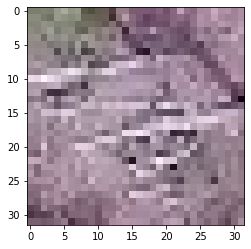

In [35]:
# Load random image

img_list = list(df['id'])
random_img = random.choice(img_list)
img = load_img(os.path.join("./aerial-cactus-identification_data/train", random_img))
plt.imshow(img)

In [49]:
df_val = df.iloc[:int(0.1*len(df))]
df_val.reset_index(drop=True, inplace=True)
df_val.head()

,id,has_cactus
0,ca248b5dff843e0561d6d16a994b21bf.jpg,has_cactus
1,902476d3f57a4c672d8e98c70bb2b9ae.jpg,has_cactus
2,206c1e80459fbdfdd71843b391c8f7fc.jpg,has_cactus
3,f624bf0ca1eb58a9d927642fae913838.jpg,has_cactus
4,04d3cd55c16808a0e078b05c5dc17628.jpg,has_cactus


In [45]:
df_train = df.iloc[int(0.1*len(df)):]
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,id,has_cactus
0,979bd09a25723eb2dc083ceed923a300.jpg,has_cactus
1,e5c540552e0f0fb7132b822d42e2d779.jpg,has_cactus
2,584a06ac05b37e3b6cdf2ccc3ced6682.jpg,has_cactus
3,927276f8a53af33aa42509ed7ce42543.jpg,has_cactus
4,49a2ae4f4030a517e759660789ab3cc0.jpg,has_cactus


In [47]:
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory="./aerial-cactus-identification_data/train/",
x_col="id",
y_col="has_cactus",
subset="training",
batch_size=32,
seed=None,
shuffle=None,
class_mode="binary",
target_size=(32,32))

Found 15750 validated image filenames belonging to 2 classes.


In [51]:
val_generator=datagen.flow_from_dataframe(
dataframe=df_val,
directory="./aerial-cactus-identification_data/train/",
x_col="id",
y_col="has_cactus",
subset="training",
batch_size=32,
seed=None,
shuffle=None,
class_mode="binary",
target_size=(32,32))

Found 1750 validated image filenames belonging to 2 classes.


In [57]:
model = DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=max)

74842112/74836368 [==============================] - 22s 0us/step


In [58]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block28_1_conv (Conv2D)   (None, None, None, 1 225280      conv5_block28_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block28_1_bn (BatchNormal (None, None, None, 1 512         conv5_block28_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block28_1_relu (Activatio (None, None, None, 1 0           conv5_block28_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block28_2_conv (Conv2D)   (None, None, None, 3 36864       conv5_block28_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block28_concat (Concatena (None, None, None, 1 0           conv5_block27_concat[0][0]       
          